In [1]:
from __future__ import  division
from __future__ import  print_function
from __future__ import absolute_import

import tensorflow as tf

import urllib

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

%matplotlib inline

/usr/local/lib/python3.5/dist-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


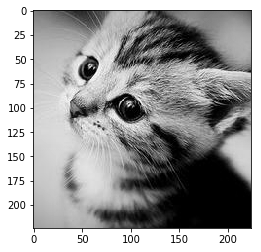

In [2]:
im_url = 'https://image.ibb.co/iFGs0x/kitty.png'
im = Image.open(urllib.request.urlopen(im_url)).convert('L')
im = np.array(im, dtype='float32')

plt.imshow(im.astype("uint8"),cmap='gray')
plt.axes()

In [3]:
im = tf.constant(im.reshape(1,im.shape[0],im.shape[1],1), name='input')

In [4]:
#定义边缘检测算子
sobel_kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]], dtype=np.float32)

In [5]:
sobel_kernel = tf.constant(sobel_kernel, shape=(3,3,1,1))

In [6]:
edge1 = tf.nn.conv2d(im, sobel_kernel, [1,1,1,1], 'SAME', name='same_conv')

In [7]:
edge2 = tf.nn.conv2d(im, sobel_kernel, [1,1,1,1], 'VALID', name='valie_conv')

In [8]:
sess = tf.InteractiveSession()

In [9]:
edge1_np = sess.run(edge1)
edge2_np = sess.run(edge2)

Text(0.5,1,'shape=(1, 224, 224, 1)')

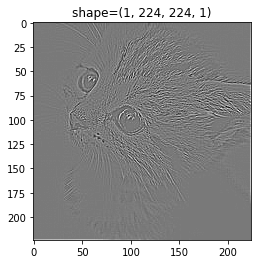

In [11]:
plt.imshow(np.squeeze(edge1_np),cmap='gray')
#np.squeeze  # 从数组的形状中删除单维条目，即把shape中为1的维度去掉
plt.title('shape={}'.format(edge1.shape))

Text(0.5,1,'shape=(1, 222, 222, 1)')

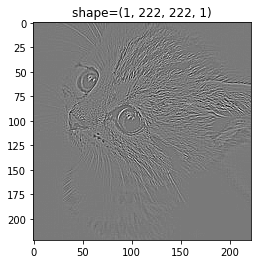

In [15]:
plt.imshow(np.squeeze(edge2_np), cmap='gray')
plt.title('shape={}'.format(edge2_np.shape))

In [27]:
im.shape

TensorShape([Dimension(1), Dimension(224), Dimension(224), Dimension(1)])

Text(0.5,1,'shape=(1, 112, 112, 1)')

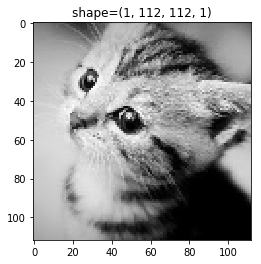

In [28]:
#池化
small_im1 = tf.nn.max_pool(im,[1,2,2,1], [1,2,2,1], 'SAME', name="same_max_pool")
small_im2 = tf.nn.max_pool(im,[1,2,2,1], [1,2,2,1], 'VALID', name="valid_max_pool")
small_im1_np, small_im2_np = sess.run([small_im1, small_im2])
plt.imshow(np.squeeze(small_im1_np), cmap="gray")
plt.title('shape={}'.format(small_im1_np.shape))

Text(0.5,1,'shape=(1, 112, 112, 1)')

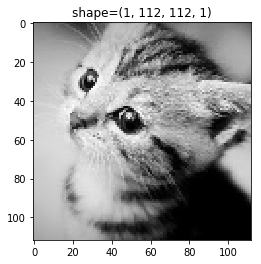

In [29]:
plt.imshow(np.squeeze(small_im2_np), cmap="gray")
plt.title('shape={}'.format(small_im2_np.shape))

In [30]:
?tf.nn.max_pool